In [16]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split



In [18]:
data = pd.read_csv("C:/Users/sreea/OneDrive/Desktop/breast-cancer-wisconsin/data.csv")

In [19]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [20]:
data.shape

(569, 33)

In [21]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [22]:
data=data.drop('Unnamed: 32', axis=1)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [24]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

C:\Users\sreea\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


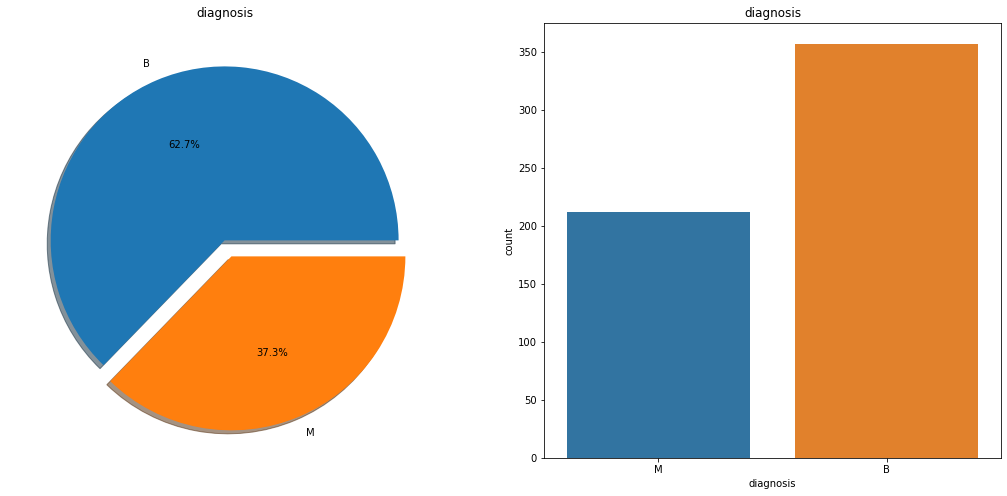

In [25]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['diagnosis'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('diagnosis')
ax[0].set_ylabel('')
sns.countplot('diagnosis',data=data,ax=ax[1])
ax[1].set_title('diagnosis')
plt.show()

In [26]:
data.diagnosis= data.diagnosis.replace('M', 1)
data.diagnosis= data.diagnosis.replace('B', 0)

In [27]:
data.head() 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<AxesSubplot:>

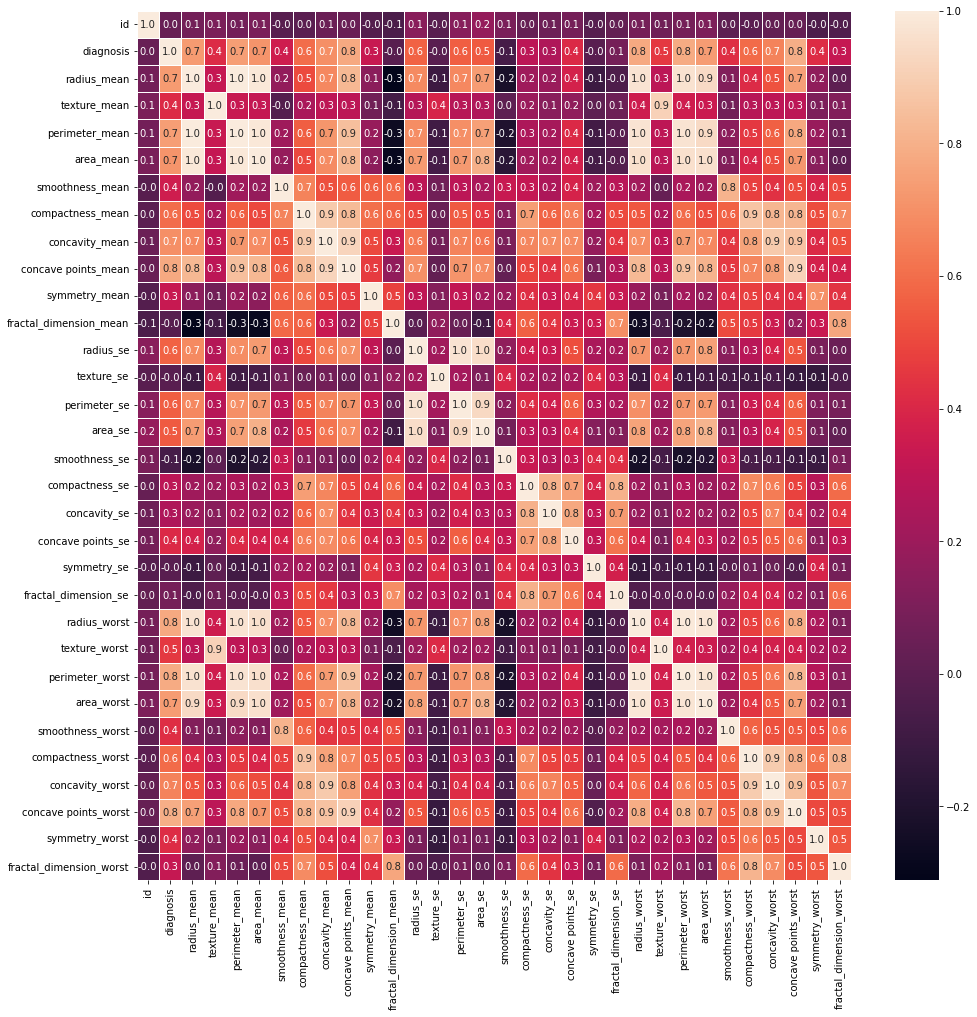

In [28]:
# plotting correlation heatmap
plt.figure(figsize = (16,16))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f')

In [29]:
# now the final features
feature=['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'area_se', 'concavity_se', 'fractal_dimension_se', 'smoothness_worst',
       'concavity_worst', 'symmetry_worst']
data1=data[feature]
data1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,area_se,concavity_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst
0,10.38,1001.0,0.11840,0.3001,153.40,0.05373,0.006193,0.1622,0.7119,0.4601
1,17.77,1326.0,0.08474,0.0869,74.08,0.01860,0.003532,0.1238,0.2416,0.2750
2,21.25,1203.0,0.10960,0.1974,94.03,0.03832,0.004571,0.1444,0.4504,0.3613
3,20.38,386.1,0.14250,0.2414,27.23,0.05661,0.009208,0.2098,0.6869,0.6638
4,14.34,1297.0,0.10030,0.1980,94.44,0.05688,0.005115,0.1374,0.4000,0.2364


<AxesSubplot:>

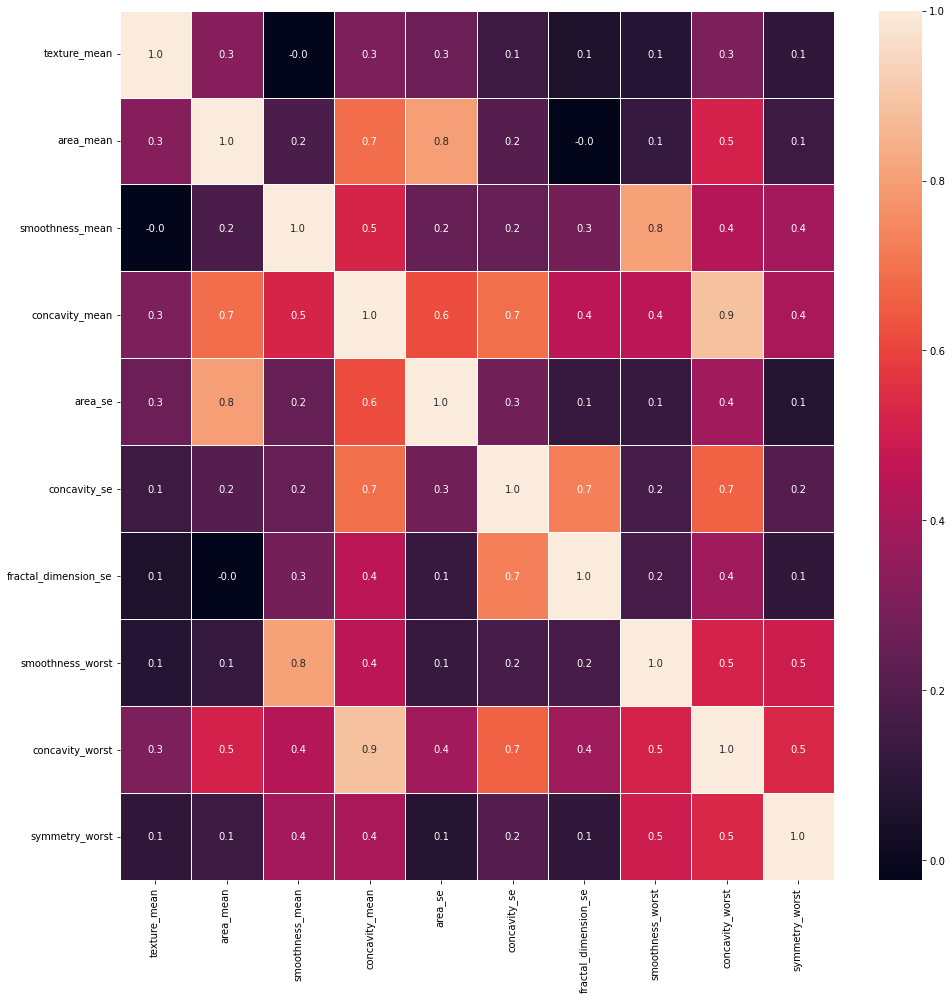

In [30]:
plt.figure(figsize = (16,16))
sns.heatmap(data1.corr(), annot=True, linewidths=.5, fmt= '.1f')

In [31]:
model_list=['K Neighbors Classifier'] 
accuracy_list=[]

In [32]:
# test and traning data split
X=data[feature]
y=data.diagnosis
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Accuracy is:  0.9181286549707602


<AxesSubplot:>

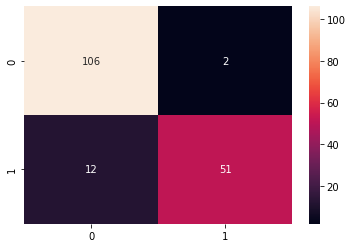

In [33]:
# K Neighbors Classifier

kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(x_train, y_train)
kn_clf_acc = accuracy_score(y_test,kn_clf.predict(x_test))
print('Accuracy is: ',kn_clf_acc)
accuracy_list.append(kn_clf_acc)
cm = confusion_matrix(y_test,kn_clf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")